In [1]:
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\\Users\\Burto\\Downloads\\GO-databases DEDS-week 4 & 5\\HC code\Week 10\\GO-databases schoon\\go_crm_schoon.accdb;')
sales = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:\\Users\\Burto\\Downloads\\GO-databases DEDS-week 4 & 5\\HC code\Week 10\\GO-databases schoon\\go_sales_schoon.accdb;')


In [3]:
retailer = pd.read_sql("SELECT * FROM retailer", conn)
crm_retailer_site = pd.read_sql("SELECT * FROM crm_retailer_site", conn)
retailer_headquarters = pd.read_sql("SELECT * FROM retailer_headquarters", conn)
returned_item = pd.read_sql("SELECT * FROM returned_item", sales)
order_details = pd.read_sql("SELECT * FROM order_details", sales)
order_header = pd.read_sql("SELECT * FROM order_header", sales)
product = pd.read_sql("SELECT * FROM product", sales)
product_type = pd.read_sql("SELECT * FROM product_type", sales)
sales_retailer_site = pd.read_sql("SELECT * FROM sales_retailer_site", sales)

C:\Users\Burto\AppData\Local\Temp\ipykernel_19468\2034775252.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  retailer = pd.read_sql("SELECT * FROM retailer", conn)
C:\Users\Burto\AppData\Local\Temp\ipykernel_19468\2034775252.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crm_retailer_site = pd.read_sql("SELECT * FROM crm_retailer_site", conn)
C:\Users\Burto\AppData\Local\Temp\ipykernel_19468\2034775252.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  retailer_headquarters = pd.read_sql("SELECT * FROM retailer_he

In [4]:
FEITmodel = pd.merge(retailer, crm_retailer_site, on = 'RETAILER_CODE')
FEITmodel = pd.merge(FEITmodel, retailer_headquarters, on = 'RETAILER_CODEMR')
FEITmodel = pd.merge(FEITmodel, order_header, on = 'RETAILER_SITE_CODE')
FEITmodel = pd.merge(FEITmodel, order_details, on = 'ORDER_NUMBER')
FEITmodel = pd.merge(FEITmodel, product, on = 'PRODUCT_NUMBER')
FEITmodel.dropna()
data = FEITmodel
data

,RETAILER_CODE,RETAILER_CODEMR,COMPANY_NAME,RETAILER_TYPE_CODE,RETAILER_SITE_CODE,ADDRESS1_x,ADDRESS2_x,CITY_x,REGION_x,POSTAL_ZONE_x,...,UNIT_PRICE,UNIT_SALE_PRICE,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION
0,15,234,SportsClub,1,198,"22, rue Saint-Jean",None,Lyon,None,F-69005,...,789.02,789.02,18-12-2019,18,333.32,.51,P102GE5IR18.jpg,EN,Lady Hailstorm Titanium Irons,Made entirely of pure titanium. A wider sole a...
1,15,234,SportsClub,1,198,"22, rue Saint-Jean",None,Lyon,None,F-69005,...,789.02,789.02,18-12-2019,18,333.32,.51,P102GE5IR18.jpg,EN,Lady Hailstorm Titanium Irons,Made entirely of pure titanium. A wider sole a...
2,15,234,SportsClub,1,198,"22, rue Saint-Jean",None,Lyon,None,F-69005,...,789.02,789.02,18-12-2019,18,333.32,.51,P102GE5IR18.jpg,EN,Lady Hailstorm Titanium Irons,Made entirely of pure titanium. A wider sole a...
3,15,234,SportsClub,1,198,"22, rue Saint-Jean",None,Lyon,None,F-69005,...,705.69,705.69,18-12-2019,18,333.32,.51,P102GE5IR18.jpg,EN,Lady Hailstorm Titanium Irons,Made entirely of pure titanium. A wider sole a...
4,15,234,SportsClub,1,198,"22, rue Saint-Jean",None,Lyon,None,F-69005,...,705.69,705.69,18-12-2019,18,333.32,.51,P102GE5IR18.jpg,EN,Lady Hailstorm Titanium Irons,Made entirely of pure titanium. A wider sole a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37428,211,414,Outdoor-Fachgeschäft Müller,6,435,Steinweg 4,None,Kottingbrunn,None,A-2442,...,5,4.25,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ..."
37429,211,414,Outdoor-Fachgeschäft Müller,6,436,Spielstraße 22,None,Ternitz,None,A-2630,...,4.94,4.48,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ..."
37430,211,414,Outdoor-Fachgeschäft Müller,6,436,Spielstraße 22,None,Ternitz,None,A-2630,...,4.94,4.48,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ..."
37431,211,414,Outdoor-Fachgeschäft Müller,6,437,Linzer Straße 35,None,Loorsdorf,None,A-3382,...,4.82,4.82,15-2-2011,17,2,.6,P99OP4FA17.jpg,EN,Aloe Relief,"Perfect for minor burns and sunburn, the aloe ..."


In [5]:
# corr_matrix = data.corr()
# print(corr_matrix['RETAILER_TYPE_CODE'].sort_values(ascending=False))

In [6]:
print(data.columns)

Index(['RETAILER_CODE', 'RETAILER_CODEMR', 'COMPANY_NAME',
       'RETAILER_TYPE_CODE', 'RETAILER_SITE_CODE', 'ADDRESS1_x', 'ADDRESS2_x',
       'CITY_x', 'REGION_x', 'POSTAL_ZONE_x', 'COUNTRY_CODE_x',
       'ACTIVE_INDICATOR', 'RETAILER_NAME_x', 'ADDRESS1_y', 'ADDRESS2_y',
       'CITY_y', 'REGION_y', 'POSTAL_ZONE_y', 'COUNTRY_CODE_y', 'PHONE', 'FAX',
       'SEGMENT_CODE', 'ORDER_NUMBER', 'RETAILER_NAME_y',
       'RETAILER_CONTACT_CODE', 'SALES_STAFF_CODE', 'SALES_BRANCH_CODE',
       'ORDER_DATE', 'ORDER_METHOD_CODE', 'ORDER_DETAIL_CODE',
       'PRODUCT_NUMBER', 'QUANTITY', 'UNIT_COST', 'UNIT_PRICE',
       'UNIT_SALE_PRICE', 'INTRODUCTION_DATE', 'PRODUCT_TYPE_CODE',
       'PRODUCTION_COST', 'MARGIN', 'PRODUCT_IMAGE', 'LANGUAGE',
       'PRODUCT_NAME', 'DESCRIPTION'],
      dtype='object')


In [7]:
print(data['RETAILER_TYPE_CODE'].unique())


['1' None '4' '8' '2' '6' '3' '7' '5']


In [8]:
data['RETAILER_TYPE_CODE'].fillna(-1, inplace=True)
y = data['RETAILER_TYPE_CODE'].astype(int)


{1, 2, 3, 4, 5, 6, 7, 8, -1}
[-1, 1, 2, 3, 4, 5, 6, 7, 8]


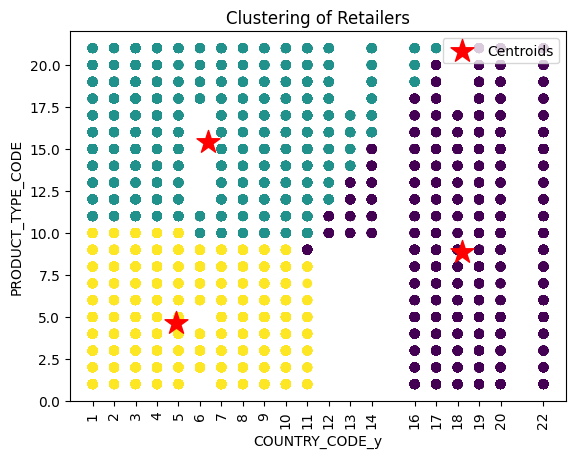

In [9]:
# extract the relevant features
# drop the rows that contain missing values
data = data.dropna(subset=['COUNTRY_CODE_y', 'PRODUCT_TYPE_CODE'])

# extract the relevant features
X = data[['COUNTRY_CODE_y', 'PRODUCT_TYPE_CODE']].astype(int)
y = data['RETAILER_TYPE_CODE'].astype(int)

# define the number of clusters
k = 3

X = data[['COUNTRY_CODE_y', 'PRODUCT_TYPE_CODE']].astype(int)
y = data['RETAILER_TYPE_CODE'].astype(int)

# define the number of clusters
k = 3

# create a KMeans model with the specified number of clusters
model = KMeans(n_clusters=k, n_init=10)

# fit the model to the data
model.fit(X)

# predict the clusters for each data point
y_pred = model.predict(X)

# get the cluster centers
centroids = model.cluster_centers_

# sort the x and y axis values
sorted_x = sorted(set(X.iloc[:, 0]))
sorted_y = sorted(set(y))

print(set(y))
print(sorted_y)

# plot the clusters and the cluster centers
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroids')

# set the x-axis, y-axis, and title labels
plt.xlabel('COUNTRY_CODE_y')
plt.ylabel('PRODUCT_TYPE_CODE')
plt.title('Clustering of Retailers')

# display the x and y axis values
plt.xticks(sorted_x, rotation=90)
# plt.yticks(sorted_y)0

# add a legend
plt.legend()

# display the plot
plt.show()